* https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
* https://www.analyticsvidhya.com/blog/2021/05/develop-your-first-deep-learning-model-in-python-with-keras/
* https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/
* https://towardsdatascience.com/beginners-guide-to-building-artificial-neural-networks-using-keras-in-python-bdc4989dab00
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
* https://towardsdatascience.com/build-your-first-machine-learning-model-with-python-in-7-minutes-30b9e1a3eafa

En `red_neuronal_borrador` está más detallado lo que estuvimos haciendo y hacemos la aclaración de por qué se llama borrador. 

La lógica para ir mejorando se ve ahí, acá sintetizamos un poco dado que se hacia muy largo.

In [5]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [6]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 366 kB/s 


In [7]:
import sys
sys.path.insert(0,'/drive/My Drive/TP_Datos_2C2021/parte_2/')

In [8]:
from preprocessing import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
import pandas as pd
import keras
from keras import backend as K
import numpy as np
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns
from keras.regularizers import l2
from tensorflow import keras
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow import math
from sklearn.metrics import ConfusionMatrixDisplay

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['figure.dpi'] = 70

# seteando tipo de grid en seaborn
sns.set_theme(style='ticks', palette=None, font_scale=.9) 

In [10]:
hamburguesas_values, hamburguesas_target, hamburguesas_test = descargar_datasets(
    url_values = 'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs',
    url_target = 'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs', 
    url_test = 'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8'
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    hamburguesas_values, 
    hamburguesas_target,
    test_size=0.4,
    random_state=66, 
    stratify=hamburguesas_target.astype(str)
)

In [12]:
X_val_dev, X_test_holdout, y_val_dev, y_test_holdout = train_test_split(
    X_test, y_test, test_size=0.1,
    random_state=66, stratify=y_test.astype(str)
)

# Knn imputer, robust scaler, one hot encoding y hashing_trick

In [ ]:
hamburguesas_train_values_ht, hamburguesas_val_dev_values_ht, X_test_holdout_sn = preprocessing_knn_imputer_robust_escaler_one_hot_encoding_hashing_trick(
    X_train, 
    X_val_dev, 
    X_test_holdout
)

hamburguesas_train_target_ohe = y_train['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})
hamburguesas_val_dev_target_enc = y_val_dev['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})

### SGD

In [ ]:
modelo = Sequential()
modelo.add(Dense(3, input_shape=(71,), activation='tanh'))
modelo.add(Dense(1, activation='sigmoid'))

2022-01-14 01:07:07.631073: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-14 01:07:07.631128: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-14 01:07:07.631171: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin-PC): /proc/driver/nvidia/version does not exist
2022-01-14 01:07:07.631854: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 216       
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=100, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.4982 - Accuracy: 0.7752 - recall: 0.0036 - precision: 0.1024 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.00

Epoch 30/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 31/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 32/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 33/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

Epoch 59/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 60/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 61/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 62/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

Epoch 88/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 89/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 90/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 91/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
auc = f'La {modelo.metrics_names[1]} es: {scores[1]}'
auc

'La auc es: 0.5'

In [ ]:
Accuracy = f'La {modelo.metrics_names[2]} es: {scores[2]}'
Accuracy

'La Accuracy es: 0.7813238501548767'

In [ ]:
recall = f'El {modelo.metrics_names[3]} es: {scores[3]}'
recall

'El recall es: 0.0'

In [ ]:
precision = f'La {modelo.metrics_names[4]} es: {scores[4]}'
precision

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()

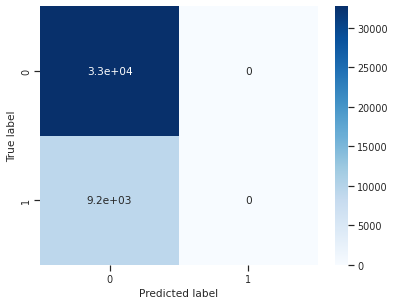

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

La matriz de confusion nos muestra nuestros $tp$ (verdaderos positivos, arriba a la izquierda), $fp$ (falsos positivos, abajo a la izquierda), $tn$ (verdaderos negativos, abajo a la derecha) y $fn$ (falsos negativos, arriba a la derecha) en una matriz.

En este caso, la tendencia del modelo es que tiende a predecir 0 sobre 1 porque si vemos la otra diagonal (la de "pifiadas") vemos que hay más casos de era 1 y lo predijo como 0, respecto de era 0 y lo predijo como 1. Por otro lado, la diagonal principal, es "saludable" pero no tanto, pues hay una diferencia muy alta entre los casos en los que era 0 y predijo 0 respecto de los de la otra diagonal pero no sucedió lo mismo en los casos en los que era 1 y predijo 1 (es igual que en era 0 y predijo 1 pero demasiado menor que en era 1 y predijo 0). 

El modelo predijo bien más positivos (41893 casos, 100%) que negativos (0 casos, 0%) porque hay una gran cantidad de verdaderos positivos y (en menor medida) falsos positivos, mientras que los verdaderos negativos y falsos negativos no existen.

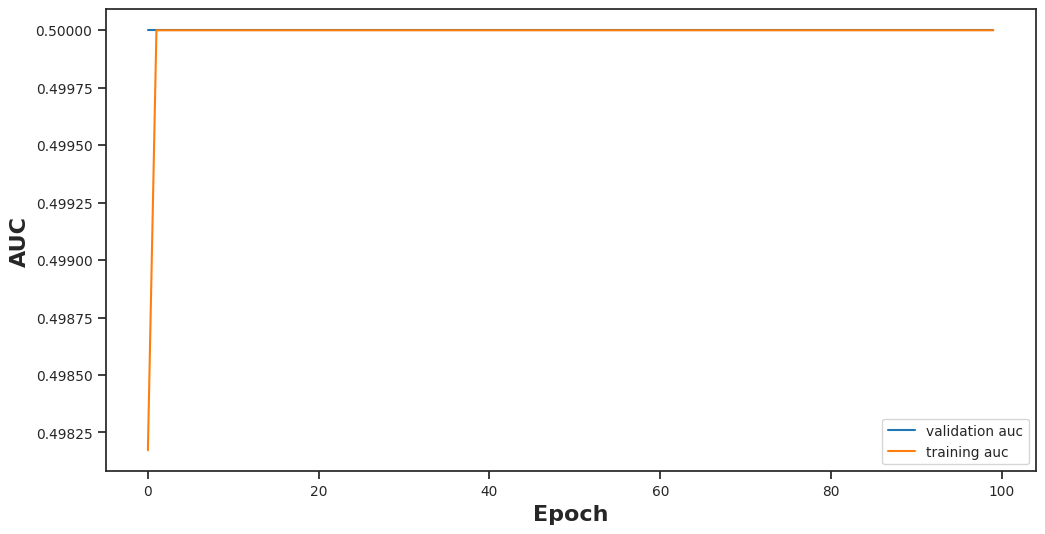

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

#### Predicción

In [ ]:
hamburguesas_test_ohe = preprocessing_knn_imputer_robust_escaler_one_hot_encoding_hashing_trick(
    None,
    None,
    None,
    hamburguesas_test,
    True)

In [ ]:
predicciones = modelo.predict(hamburguesas_test_ohe)

In [ ]:
auxiliar = hamburguesas_test.join(hamburguesas_target).reset_index()
auxiliar = auxiliar[['id', 'llovieron_hamburguesas_al_dia_siguiente']]
auxiliar = auxiliar.set_index('id')

In [ ]:
nuestra_prediccion = pd.DataFrame(data=predicciones, columns=auxiliar.columns, index=auxiliar.index)

In [ ]:
for v in nuestra_prediccion.columns:
  nuestra_prediccion.loc[:, v] = nuestra_prediccion[v].map({0: 'no', 1: 'si',})

In [ ]:
nuestra_prediccion.to_csv('red_neuronal_knn_imputer_robust_escaler_one_hot_encoding_hashing_trick.csv')

In [ ]:
modelo = Sequential()
modelo.add(Dense(10, input_shape=(71,), activation='tanh'))
modelo.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                720       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 6s 2ms/step - loss: 0.0000e+00 - auc: 0.4918 - Accuracy: 0.7470 - recall: 0.0686 - precision: 0.2334 - val_loss: 0.0000e+00 - val_auc: 0.5046 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5002 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/200
2182/2182 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.00

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'fn': 9161, 'fp': 0, 'tn': 32732, 'tp': 0}

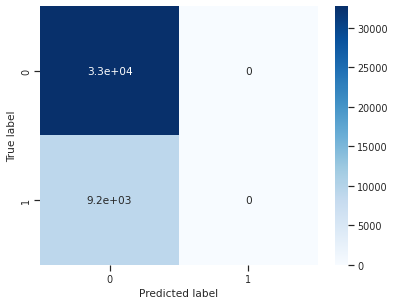

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

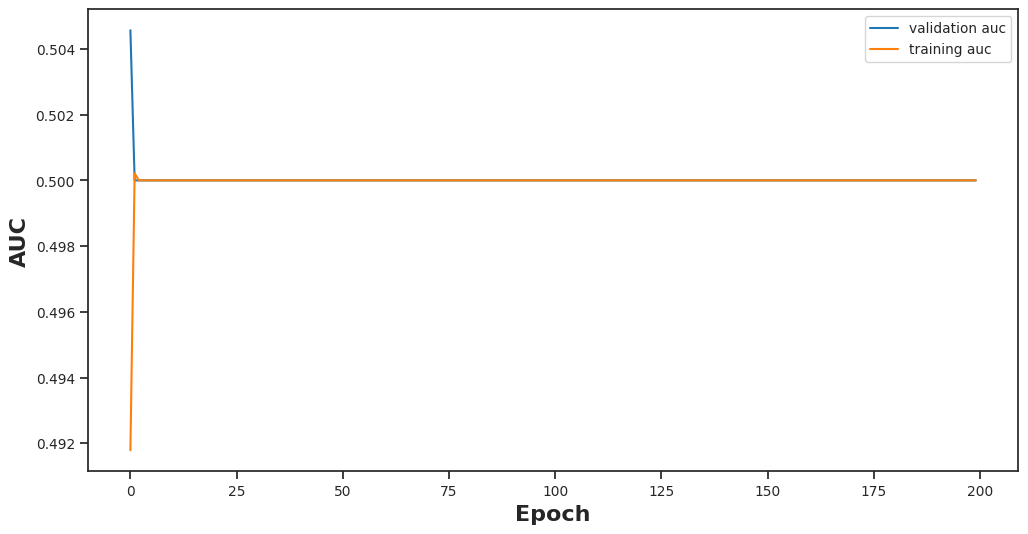

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### Adadelta

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                1152      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-traina

In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.0000e+00 - auc: 0.4128 - Accuracy: 0.7416 - recall: 0.0332 - precision: 0.1338 - val_loss: 0.0000e+00 - val_auc: 0.3169 - val_Accuracy: 0.7218 - val_recall: 0.0282 - val_precision: 0.0858
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.4191 - Accuracy: 0.7505 - recall: 0.0253 - precision: 0.1322 - val_loss: 0.0000e+00 - val_auc: 0.3166 - val_Accuracy: 0.7425 - val_recall: 0.0158 - val_precision: 0.0757
Epoch 3/200
2182/2182 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - auc: 0.4129 - Accuracy: 0.7592 - recall: 0.0196 - precision: 0.1394 - val_loss: 0.0000e+00 - val_auc: 0.3166 - val_Accuracy: 0.7600 - val_recall: 0.0075 - val_precision: 0.0670
Epoch 4/200
2182/2182 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - auc: 0.4161 - Accuracy: 0.7661 - recall: 0.0134 - precision: 0.1385 - val_loss: 0.0000e+00 - val_auc: 0.3169 

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'fn': 9161, 'fp': 0, 'tn': 32732, 'tp': 0}

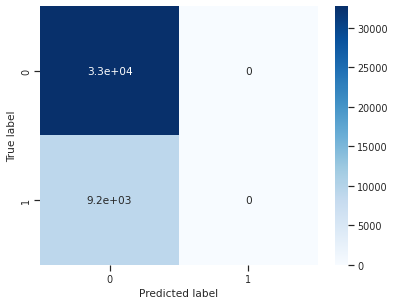

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

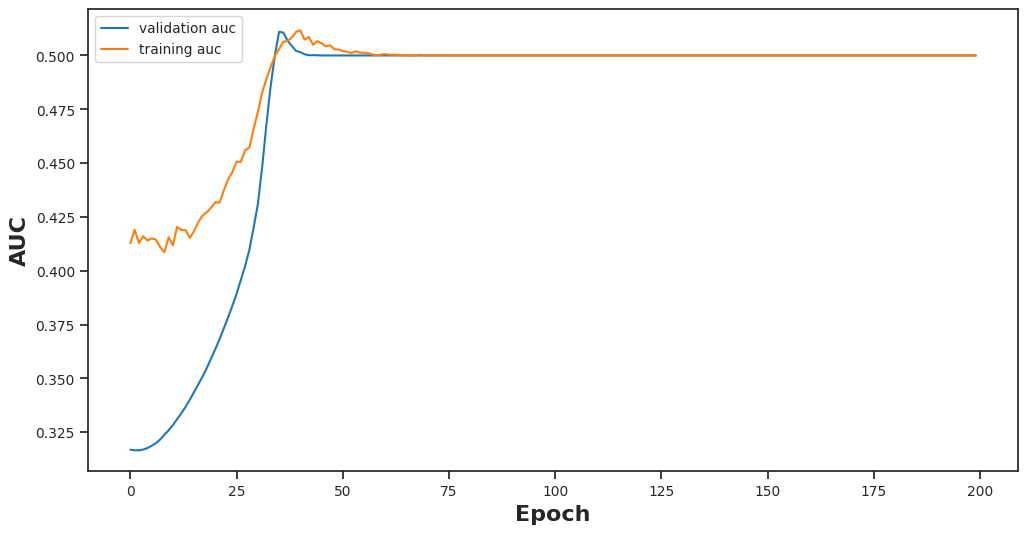

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(1, activation="sigmoid"))

2022-01-13 20:40:28.694258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-13 20:40:28.695047: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-13 20:40:28.695438: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin-PC): /proc/driver/nvidia/version does not exist
2022-01-13 20:40:28.698248: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1152      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-trainabl

In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.0000e+00 - auc: 0.5491 - Accuracy: 0.5883 - recall: 0.4598 - precision: 0.2551 - val_loss: 0.0000e+00 - val_auc: 0.6087 - val_Accuracy: 0.6902 - val_recall: 0.3828 - val_precision: 0.3238
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5445 - Accuracy: 0.6197 - recall: 0.3906 - precision: 0.2570 - val_loss: 0.0000e+00 - val_auc: 0.5983 - val_Accuracy: 0.7300 - val_recall: 0.2630 - val_precision: 0.3456
Epoch 3/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5396 - Accuracy: 0.6546 - recall: 0.3232 - precision: 0.2636 - val_loss: 0.0000e+00 - val_auc: 0.5892 - val_Accuracy: 0.7552 - val_recall: 0.1492 - val_precision: 0.3570
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5372 - Accuracy: 0.6873 - recall: 0.2608 - precision: 0.2741 - val_loss: 0.0000e+00 - val_auc: 0.5799 

Epoch 31/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5316 - Accuracy: 0.7816 - recall: 0.0018 - precision: 0.7000 - val_loss: 0.0000e+00 - val_auc: 0.5449 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 32/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5316 - Accuracy: 0.7815 - recall: 0.0015 - precision: 0.6216 - val_loss: 0.0000e+00 - val_auc: 0.5337 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 33/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5277 - Accuracy: 0.7815 - recall: 0.0017 - precision: 0.6842 - val_loss: 0.0000e+00 - val_auc: 0.5246 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 34/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5264 - Accuracy: 0.7814 - recall: 0.0011 - precision: 0.6071 - val_loss: 0

Epoch 89/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 90/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 91/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 92/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

Epoch 118/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 119/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 120/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 121/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 -

Epoch 147/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 148/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 149/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 150/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 -

Epoch 176/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 177/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 178/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 179/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 -

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

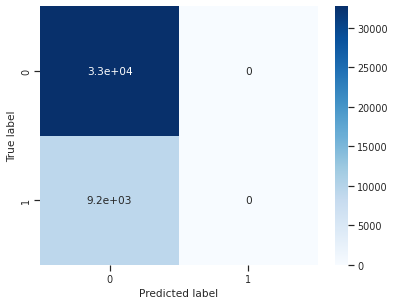

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

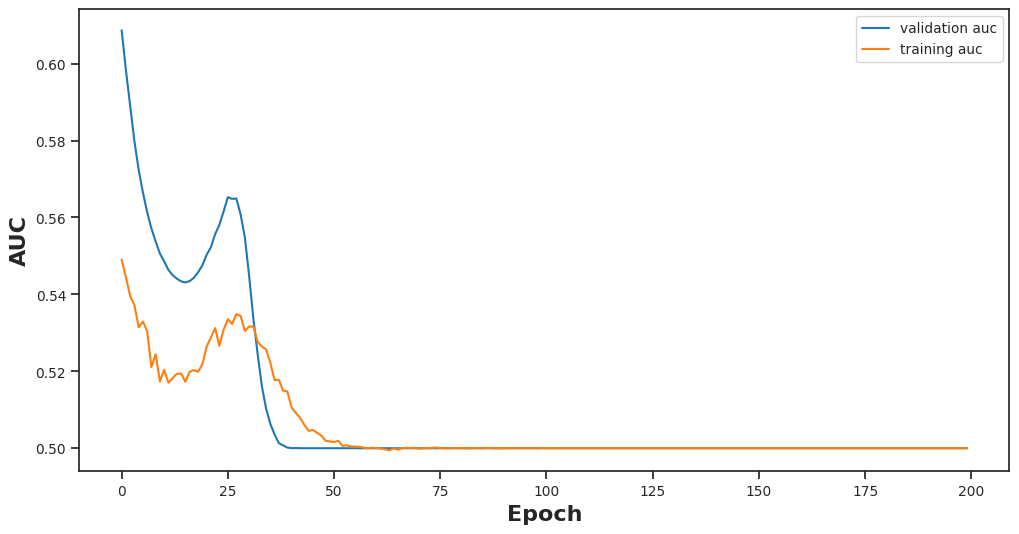

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                1152      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-traina

In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.4220 - auc: 0.3974 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4202 - val_auc: 0.4015 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4184 - auc: 0.3977 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4167 - val_auc: 0.4068 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.4150 - auc: 0.3993 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4134 - val_auc: 0.4130 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4118 - auc: 0.4032 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0

Epoch 31/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3713 - auc: 0.4737 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3711 - val_auc: 0.4851 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 32/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3710 - auc: 0.4782 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3708 - val_auc: 0.4840 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 33/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3707 - auc: 0.4822 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3706 - val_auc: 0.4831 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 34/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3706 - auc: 0.4814 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 61/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3914 - auc: 0.4991 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3922 - val_auc: 0.4998 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 62/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3931 - auc: 0.4986 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3940 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 63/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3950 - auc: 0.4988 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3959 - val_auc: 0.5001 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 64/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3969 - auc: 0.4995 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 91/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.4718 - auc: 0.5001 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4736 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 92/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4754 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4772 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 93/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4790 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4809 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 94/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4828 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 121/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.6122 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6150 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 122/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.6179 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6208 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 123/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.6237 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6267 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 124/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.6297 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 151/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.8198 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.8239 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 152/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.8280 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.8321 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 153/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.8363 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.8405 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 154/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.8447 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 181/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.1038 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1092 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 182/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.1146 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1200 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 183/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.1255 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1310 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 184/200
2182/2182 [==============================] - 7s 3ms/step - loss: 1.1365 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 4s 2ms/step - loss: 1.3313 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

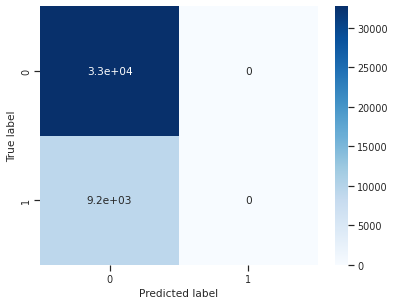

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

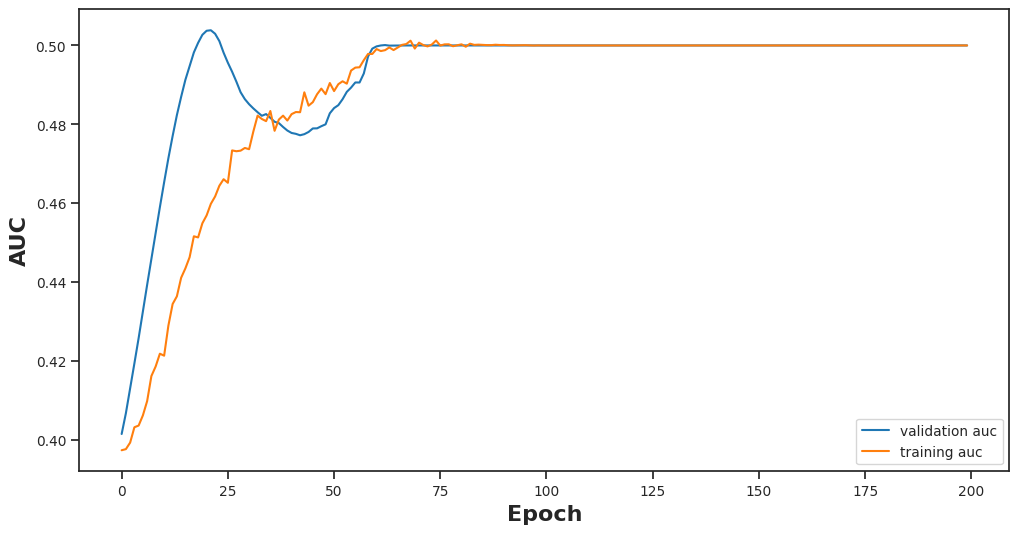

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                1152      
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-traina

In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.4156 - auc: 0.6069 - Accuracy: 0.7060 - recall: 0.4264 - precision: 0.3562 - val_loss: 0.4137 - val_auc: 0.6551 - val_Accuracy: 0.7705 - val_recall: 0.4474 - val_precision: 0.4737
Epoch 2/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.4117 - auc: 0.6100 - Accuracy: 0.7407 - recall: 0.3637 - precision: 0.3983 - val_loss: 0.4098 - val_auc: 0.6514 - val_Accuracy: 0.7818 - val_recall: 0.3935 - val_precision: 0.5015
Epoch 3/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4079 - auc: 0.6041 - Accuracy: 0.7565 - recall: 0.3122 - precision: 0.4231 - val_loss: 0.4060 - val_auc: 0.6483 - val_Accuracy: 0.7899 - val_recall: 0.3580 - val_precision: 0.5289
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4042 - auc: 0.6028 - Accuracy: 0.7679 - recall: 0.2706 - precision: 0.4492 - val_loss: 0.4024 - val_auc: 0.6456 - val_Accuracy: 0.7931 - val_rec

Epoch 62/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4414 - auc: 0.5004 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4436 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 63/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4458 - auc: 0.5006 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4480 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 64/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.4502 - auc: 0.5002 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4525 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 65/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.4548 - auc: 0.5003 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 92/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.6240 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6280 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 93/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.6320 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6361 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 94/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.6402 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.6444 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 95/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.6485 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 122/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.9237 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9297 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 123/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.9359 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9420 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 124/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.9482 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9544 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 125/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.9606 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 152/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.3471 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3552 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 153/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.3634 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3716 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 154/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.3798 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3880 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 155/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.3962 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 182/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.8933 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.9034 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 183/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.9136 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.9238 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 184/200
2182/2182 [==============================] - 6s 3ms/step - loss: 1.9342 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.9446 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 185/200
2182/2182 [==============================] - 7s 3ms/step - loss: 1.9549 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 2.2912 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

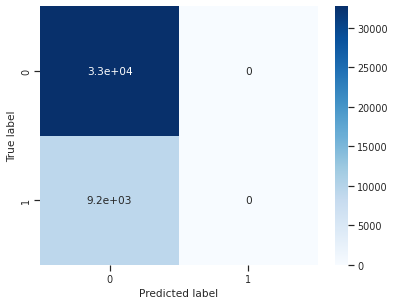

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

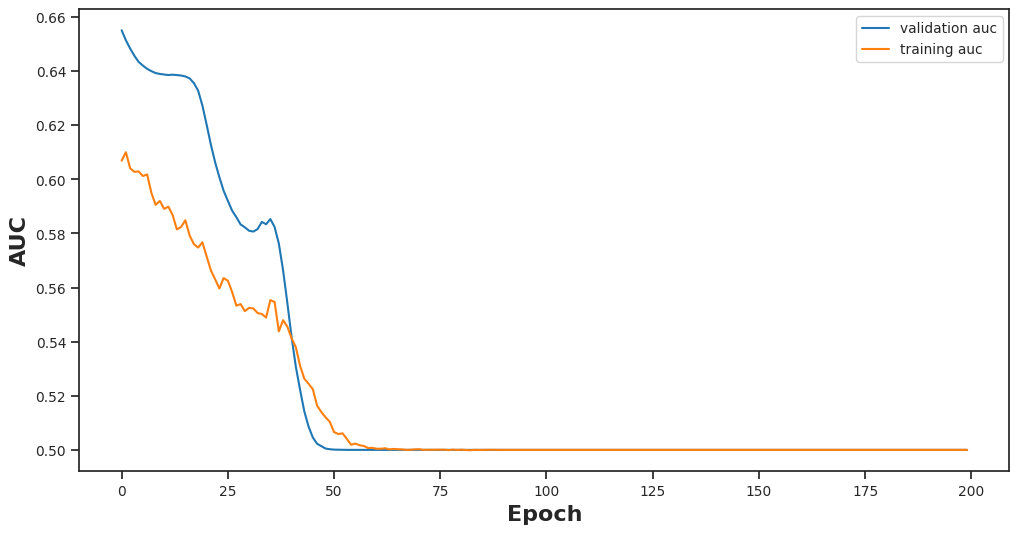

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                1152      
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0418 - auc: 0.4720 - Accuracy: 0.3218 - recall: 0.6679 - precision: 0.1943 - val_loss: 0.0418 - val_auc: 0.4696 - val_Accuracy: 0.3534 - val_recall: 0.5972 - val_precision: 0.1895
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0417 - auc: 0.4641 - Accuracy: 0.3764 - recall: 0.5549 - precision: 0.1874 - val_loss: 0.0417 - val_auc: 0.4656 - val_Accuracy: 0.4223 - val_recall: 0.4822 - val_precision: 0.1850
Epoch 3/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0417 - auc: 0.4654 - Accuracy: 0.4490 - recall: 0.4433 - precision: 0.1842 - val_loss: 0.0416 - val_auc: 0.4690 - val_Accuracy: 0.5040 - val_recall: 0.3661 - val_precision: 0.1830
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0416 - auc: 0.4696 - Accuracy: 0.5317 - recall: 0.3338 - precision: 0.1845 - val_loss: 0.0415 - val_auc: 0.4706 - val_Accuracy: 0.5904 - val_rec

Epoch 32/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0411 - auc: 0.3682 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0412 - val_auc: 0.3688 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 33/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0412 - auc: 0.3704 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0413 - val_auc: 0.3716 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 34/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0413 - auc: 0.3730 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0414 - val_auc: 0.3748 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 35/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0415 - auc: 0.3759 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 62/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0499 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0502 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 63/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0504 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0507 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 64/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0510 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0512 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 65/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0515 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 92/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0744 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0750 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 93/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0756 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0762 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 94/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0768 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0774 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 95/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0780 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 122/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1202 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1211 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 123/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1221 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1231 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 124/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1241 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1250 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 125/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1260 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 152/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1908 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1922 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 153/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1937 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1951 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 154/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1965 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1979 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 155/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1994 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 182/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.2891 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2910 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 183/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.2929 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2948 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 184/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.2967 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2986 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 185/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.3006 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 0.3644 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

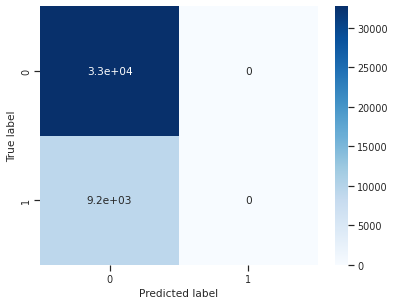

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

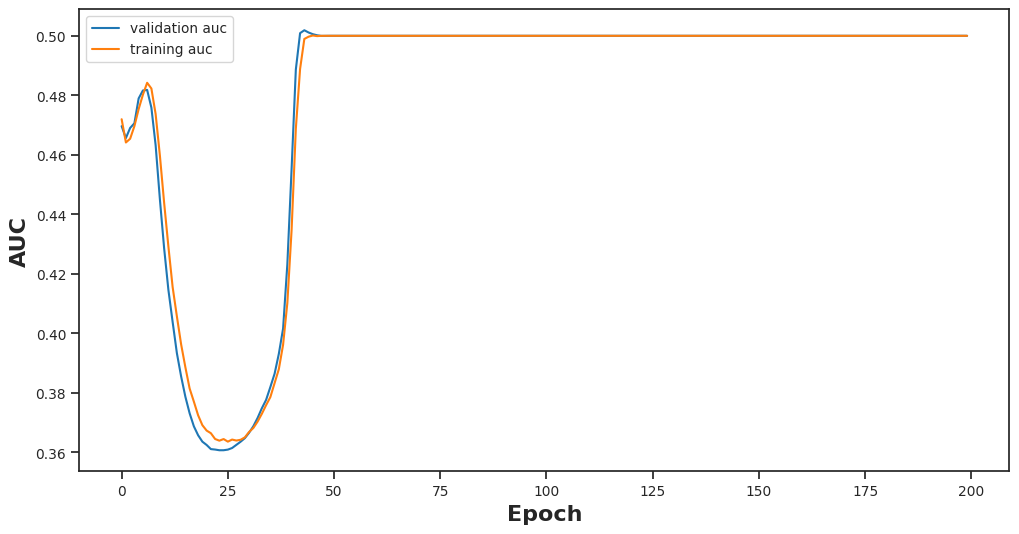

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.01)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                1152      
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.0407 - auc: 0.4918 - Accuracy: 0.3613 - recall: 0.6983 - precision: 0.2105 - val_loss: 0.0402 - val_auc: 0.5222 - val_Accuracy: 0.6399 - val_recall: 0.3148 - val_precision: 0.2467
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0394 - auc: 0.5457 - Accuracy: 0.7564 - recall: 0.1588 - precision: 0.3679 - val_loss: 0.0386 - val_auc: 0.5541 - val_Accuracy: 0.7861 - val_recall: 0.0485 - val_precision: 0.6435
Epoch 3/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0376 - auc: 0.5241 - Accuracy: 0.7828 - recall: 0.0135 - precision: 0.6710 - val_loss: 0.0366 - val_auc: 0.5122 - val_Accuracy: 0.7813 - val_recall: 2.1832e-04 - val_precision: 0.6667
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0355 - auc: 0.5014 - Accuracy: 0.7813 - recall: 6.5496e-05 - precision: 1.0000 - val_loss: 0.0344 - val_auc: 0.4984 - val_Accuracy: 0.7813 -

Epoch 31/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0037 - auc: 0.4957 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0036 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 32/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0034 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0033 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 33/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0031 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0030 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 34/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0029 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

2182/2182 [==============================] - 6s 3ms/step - loss: 145615194615026024448.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 146187186952074166272.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 86/200
2182/2182 [==============================] - 6s 3ms/step - loss: 146731735478893019136.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 147256721494830481408.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 87/200
2182/2182 [==============================] - 6s 3ms/step - loss: 147754272496631676928.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 148240045529876135936.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 88/200
2182/2182 [==============================] - 6s 3ms/

Epoch 111/200
2182/2182 [==============================] - 7s 3ms/step - loss: 157686943882611261440.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 157745912890232143872.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 112/200
2182/2182 [==============================] - 6s 3ms/step - loss: 157801345868458098688.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 157860086177660403712.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 113/200
2182/2182 [==============================] - 6s 3ms/step - loss: 157914657138770182144.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 157969527167042715648.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 114/200
2182/2182 [========================

Epoch 137/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 138/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 139/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 140/200
2182/2182 [========================

Epoch 163/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 164/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 165/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 166/200
2182/2182 [========================

Epoch 189/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 190/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 191/200
2182/2182 [==============================] - 6s 3ms/step - loss: 158850719766007513088.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 158850561436333113344.0000 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 192/200
2182/2182 [========================

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 4s 2ms/step - loss: 158850561436333113344.0000 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

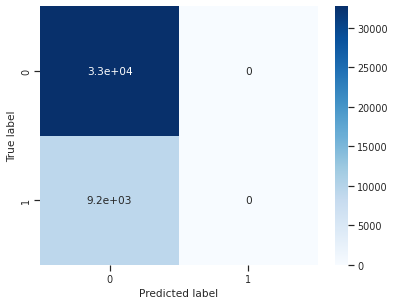

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

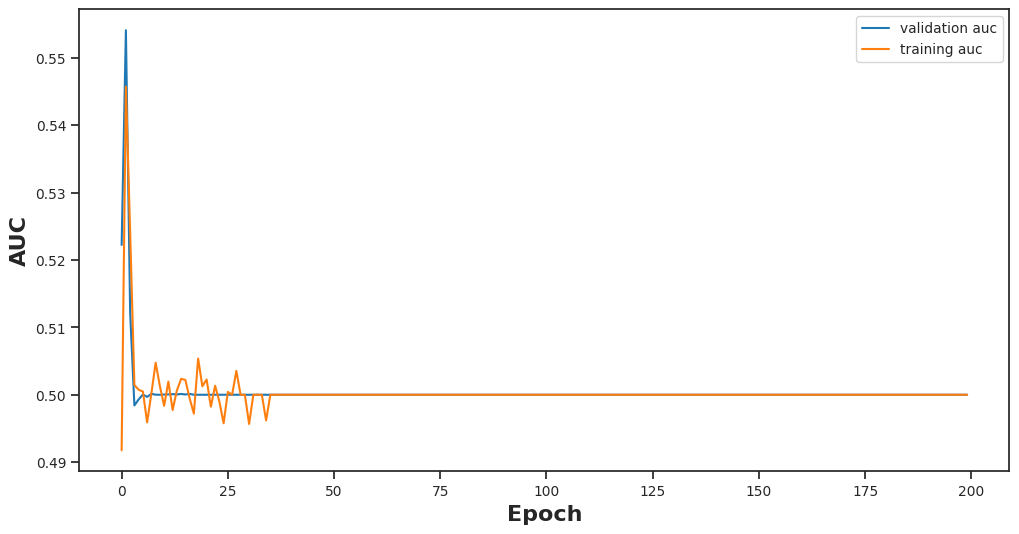

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

Esta es la que mejor score en auc dio pero es raro que el score de validation de más que el de trainning, por eso la desestimamos.

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                1152      
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=200, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/200
2182/2182 [==============================] - 8s 3ms/step - loss: 0.0409 - auc: 0.4351 - Accuracy: 0.2912 - recall: 0.6789 - precision: 0.1886 - val_loss: 0.0409 - val_auc: 0.4328 - val_Accuracy: 0.3152 - val_recall: 0.6241 - val_precision: 0.1846
Epoch 2/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0408 - auc: 0.4174 - Accuracy: 0.3397 - recall: 0.5757 - precision: 0.1816 - val_loss: 0.0408 - val_auc: 0.4167 - val_Accuracy: 0.3829 - val_recall: 0.5153 - val_precision: 0.1807
Epoch 3/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0407 - auc: 0.4050 - Accuracy: 0.4128 - recall: 0.4645 - precision: 0.1777 - val_loss: 0.0407 - val_auc: 0.4039 - val_Accuracy: 0.4707 - val_recall: 0.3950 - val_precision: 0.1787
Epoch 4/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0407 - auc: 0.3934 - Accuracy: 0.4992 - recall: 0.3460 - precision: 0.1746 - val_loss: 0.0406 - val_auc: 0.3913 - val_Accuracy: 0.5612 - val_rec

Epoch 61/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0495 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0497 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 62/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0499 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0502 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 63/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0504 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0506 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 64/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0509 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 91/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0688 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0692 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 92/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0697 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0701 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 93/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0705 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0710 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 94/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0715 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_los

Epoch 121/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1021 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1028 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 122/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1035 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1042 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 123/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1049 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1056 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 124/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.1063 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 151/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1512 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1521 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 152/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1531 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1540 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 153/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1550 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1560 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 154/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.1570 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

Epoch 181/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.2208 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2221 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 182/200
2182/2182 [==============================] - 6s 3ms/step - loss: 0.2235 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2249 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 183/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.2263 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.2277 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 184/200
2182/2182 [==============================] - 7s 3ms/step - loss: 0.2291 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 4s 2ms/step - loss: 0.2778 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

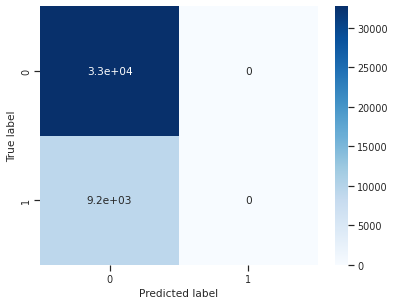

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

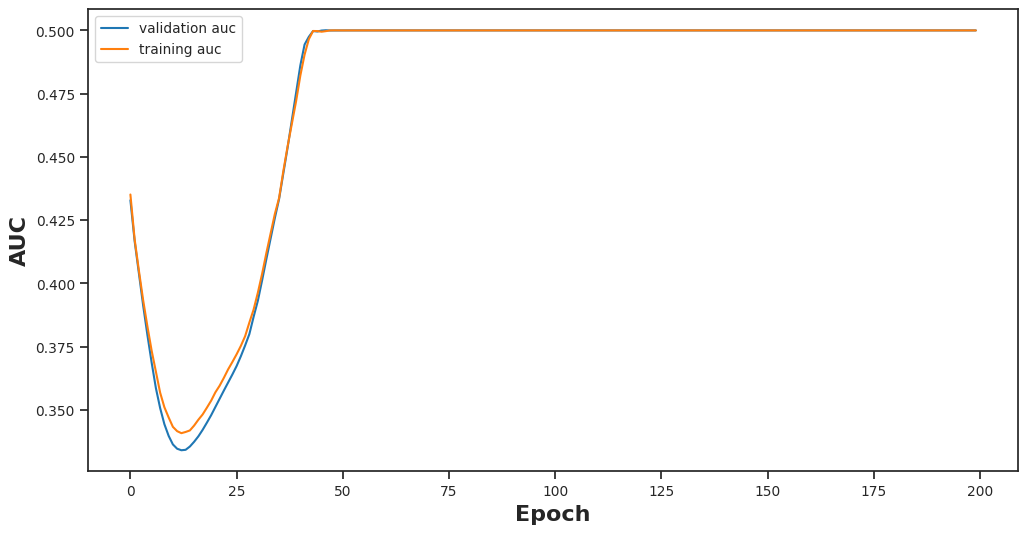

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### SGD bis

Esto debería estar en SGD.

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(71,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.0001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                1152      
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dense_38 (Dense)            (None, 4)                 36        
                                                                 
 dense_39 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_ht.values, hamburguesas_train_target_ohe.values, epochs=100, validation_data=(hamburguesas_val_dev_values_ht.values, hamburguesas_val_dev_target_enc.values)
)

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_ht, hamburguesas_val_dev_target_enc)

In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

# Mean imputer, standar scaler, one hot encoding y binary encoding

In [ ]:
hamburguesas_train_values_bin, hamburguesas_val_dev_values_bin, X_test_holdout_sn = preprocessing_mean_imputer_standar_escaler_one_hot_encoding_binary_encoding(
    X_train, 
    X_val_dev, 
    X_test_holdout
)

hamburguesas_train_target_ohe = y_train['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})
hamburguesas_val_dev_target_enc = y_val_dev['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})

Hay un bug, por eso falta el feature `barrio_4`en `hamburguesas_val_dev_values_bin`, por lo que eliminamos ese feature `hamburguesas_train_values_bin`

In [ ]:
hamburguesas_train_values_bin.drop(labels='barrio_4', axis=1, inplace=True)

### SGD

In [ ]:
modelo = Sequential()
modelo.add(Dense(10, input_shape=(70,), activation='tanh'))
modelo.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                710       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_bin.values, hamburguesas_train_target_ohe.values, epochs=100, validation_data=(hamburguesas_val_dev_values_bin.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5799 - Accuracy: 0.7669 - recall: 0.0727 - precision: 0.3439 - val_loss: 0.0000e+00 - val_auc: 0.5272 - val_Accuracy: 0.7813 - val_recall: 1.0916e-04 - val_precision: 0.5000
Epoch 2/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5025 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+

Epoch 30/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 31/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 32/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 33/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

Epoch 59/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 60/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 61/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 62/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

Epoch 88/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 89/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 90/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 91/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_bin, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'El recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
f1 = 0.0
f1_score = f'La f1 score es: {f1}'
f1_score

'La f1 score es: 0.0'

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_bin)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()

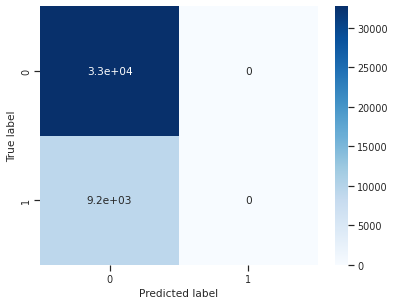

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

En este caso, la tendencia del modelo es que tiende a predecir 0 sobre 1 porque si vemos la otra diagonal (la de "pifiadas") vemos que hay más casos de era 1 y lo predijo como 0, respecto de era 0 y lo predijo como 1. Por otro lado, la diagonal principal, es "saludable" pero no tanto, pues hay una diferencia muy alta entre los casos en los que era 0 y predijo 0 respecto de los de la otra diagonal pero no sucedió lo mismo en los casos en los que era 1 y predijo 1 (es igual que en era 0 y predijo 1 pero demasiado menor que en era 1 y predijo 0). 

El modelo predijo bien más positivos (41893 casos, 100%) que negativos (0 casos, 0%) porque hay una gran cantidad de verdaderos positivos y (en menor medida) falsos positivos, mientras que los verdaderos negativos y falsos negativos no existen.

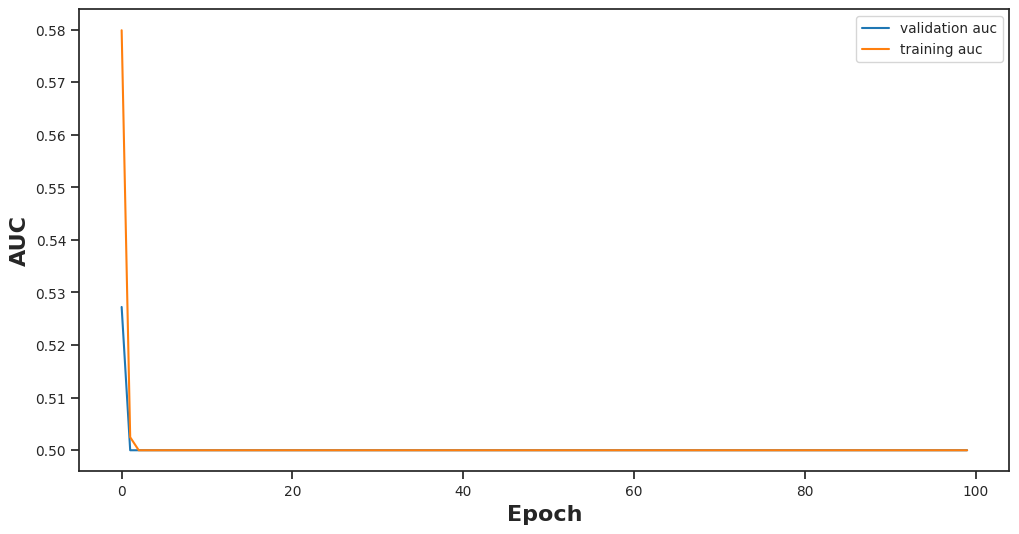

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

#### Predicción

In [ ]:
hamburguesas_test_ohe = preprocessing_mean_imputer_standar_escaler_one_hot_encoding_binary_encoding(
    None,
    None,
    None,
    hamburguesas_test,
    True)

Para que no haya errores, como `hamburguesas_train_values_bin` tiene 70 features, a `hamburguesas_test_ohe` lo vamos a forzar a que tenga la misma cantidad. Para eso le borramos `col_1`.

In [ ]:
hamburguesas_test_ohe.drop(labels='col_1', axis=1, inplace=True)

In [ ]:
predicciones = modelo.predict(hamburguesas_test_ohe)

In [ ]:
auxiliar = hamburguesas_test.join(hamburguesas_target).reset_index()
auxiliar = auxiliar[['id', 'llovieron_hamburguesas_al_dia_siguiente']]
auxiliar = auxiliar.set_index('id')

In [ ]:
nuestra_prediccion = pd.DataFrame(data=predicciones, columns=auxiliar.columns, index=auxiliar.index)

In [ ]:
for v in nuestra_prediccion.columns:
  nuestra_prediccion.loc[:, v] = nuestra_prediccion[v].map({0: 'no', 1: 'si',})

In [ ]:
nuestra_prediccion.to_csv('red_neuronal_mean_imputer_standar_escaler_one_hot_encoding_binary_encoding.csv')

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(70,), activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.SGD(lr=0.0001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_bin.values, hamburguesas_train_target_ohe.values, epochs=100, validation_data=(hamburguesas_val_dev_values_bin.values, hamburguesas_val_dev_target_enc.values)
)

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_bin, hamburguesas_val_dev_target_enc)

In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

In [ ]:
resultado = f'El {modelo.metrics_names[3]} es: {scores[3]}'
resultado

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_bin)

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()

### Adadelta

In [ ]:
modelo = Sequential()
modelo.add(Dense(16, input_shape=(70,), activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(4, activation='relu'))
modelo.add(Dense(1, activation="sigmoid"))

In [ ]:
opt = keras.optimizers.Adadelta(lr=0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC', 'Accuracy', 'Recall', 'Precision'])
modelo.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                1136      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_52 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_53 (Dense)            (None, 4)                 36        
                                                                 
 dense_54 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-train

In [ ]:
historia = modelo.fit(
    hamburguesas_train_values_bin.values, hamburguesas_train_target_ohe.values, epochs=100, validation_data=(hamburguesas_val_dev_values_bin.values, hamburguesas_val_dev_target_enc.values)
)

Epoch 1/100
2182/2182 [==============================] - 8s 3ms/step - loss: 0.0000e+00 - auc: 0.5441 - Accuracy: 0.3298 - recall: 0.8591 - precision: 0.2271 - val_loss: 0.0000e+00 - val_auc: 0.5693 - val_Accuracy: 0.3389 - val_recall: 0.8825 - val_precision: 0.2330
Epoch 2/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5439 - Accuracy: 0.3722 - recall: 0.8040 - precision: 0.2311 - val_loss: 0.0000e+00 - val_auc: 0.5661 - val_Accuracy: 0.3944 - val_recall: 0.8079 - val_precision: 0.2386
Epoch 3/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5427 - Accuracy: 0.4109 - recall: 0.7393 - precision: 0.2330 - val_loss: 0.0000e+00 - val_auc: 0.5621 - val_Accuracy: 0.4595 - val_recall: 0.7130 - val_precision: 0.2461
Epoch 4/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5426 - Accuracy: 0.4507 - recall: 0.6696 - precision: 0.2348 - val_loss: 0.0000e+00 - val_auc: 0.5549 

2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5459 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5562 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 61/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5444 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5555 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 62/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5437 - Accuracy: 0.7813 - recall: 6.5496e-05 - precision: 1.0000 - val_loss: 0.0000e+00 - val_auc: 0.5532 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 63/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5374 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+0

Epoch 89/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5013 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 90/100
2182/2182 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - auc: 0.5004 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 91/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5001 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0000e+00 - val_auc: 0.5000 - val_Accuracy: 0.7813 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 92/100
2182/2182 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - auc: 0.5010 - Accuracy: 0.7813 - recall: 0.0000e+00 - pre

In [ ]:
scores = modelo.evaluate(hamburguesas_val_dev_values_bin, hamburguesas_val_dev_target_enc)

1310/1310 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - auc: 0.5000 - Accuracy: 0.7813 - recall: 0.0000e+00 - precision: 0.0000e+00


In [ ]:
resultado = f'La {modelo.metrics_names[1]} es: {scores[1]}'
resultado

'La auc es: 0.5'

In [ ]:
resultado = f'La {modelo.metrics_names[2]} es: {scores[2]}'
resultado

'La Accuracy es: 0.7813238501548767'

In [ ]:
resultado = f'La {modelo.metrics_names[3]} es: {scores[3]}'
resultado

'La recall es: 0.0'

In [ ]:
resultado = f'La {modelo.metrics_names[4]} es: {scores[4]}'
resultado

'La precision es: 0.0'

In [ ]:
cm = math.confusion_matrix(hamburguesas_val_dev_target_enc, prediccion).numpy()
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 32732, 'fp': 0, 'fn': 9161, 'tp': 0}

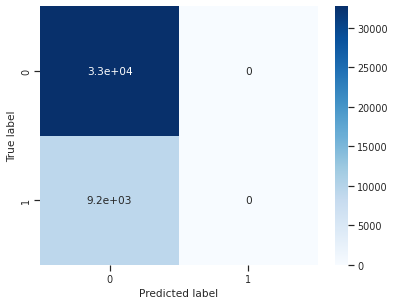

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

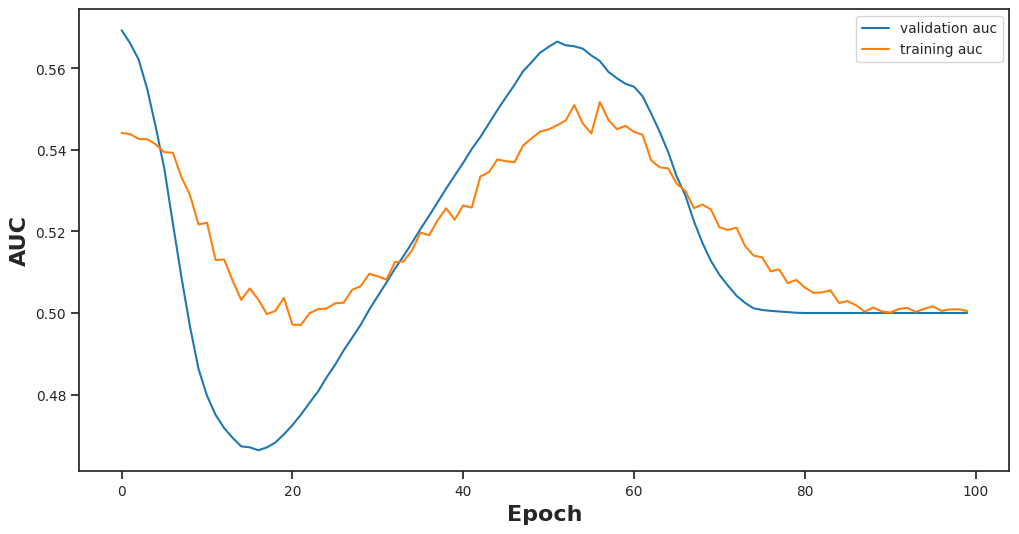

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(historia.history["val_auc"], label="validation auc")
plt.plot(historia.history["auc"], label="training auc")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("AUC", weight="bold", fontsize=16)
plt.legend()